### Predicting the crop production

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [170]:
data = pd.read_csv('cdataset.csv')
data.head()

,Year,Dist,Precipitation,Min_Temp,Cloud_Cover,Vapour_pressure,Area,Production
0,2019,Bidar,622.438,27.643,35.241,17.9530,4709,9043
1,2020,Bangalore,748.194,25.263,49.134,21.5600,18790,20981
2,2021,Belgaum,1334.194,21.254,39.728,22.5509,4398,6054
3,2022,Bellary,574.325,26.407,38.466,20.0080,3768,5903
4,2023,Kolar,724.545,25.464,47.029,20.6300,2278,2759


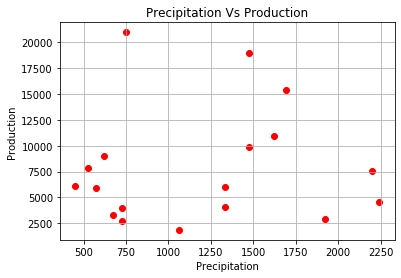

In [171]:
#To check the correlation
plt.scatter(data['Precipitation'],data['Production'],color='red')
plt.title("Precipitation Vs Production")
plt.xlabel("Precipitation")
plt.ylabel("Production")
plt.grid()
plt.show()

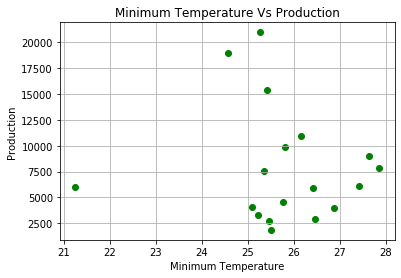

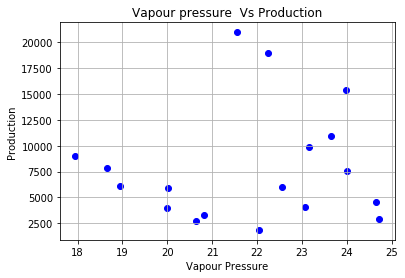

In [172]:
plt.scatter(data['Min_Temp'],data['Production'],color='green')
plt.title("Minimum Temperature Vs Production")
plt.xlabel("Minimum Temperature")
plt.ylabel("Production")
plt.grid()
plt.show()

plt.scatter(data['Vapour_pressure'],data['Production'],color='blue')
plt.title("Vapour pressure  Vs Production")
plt.xlabel("Vapour Pressure")
plt.ylabel("Production")
plt.grid()
plt.show()


In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [174]:

X = data[['Area']] 
Y = data['Production']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=1)
reg = LinearRegression()
reg.fit(x_train,y_train)
  
# prediction
y_pred=reg.predict(x_test)
y_pred

array([ 3834.0464198 ,  4561.42499993,  5431.30172296,  5231.37895532,
       19542.87154515,  2309.10360706])

In [175]:
# regression Coefficients
#print('\nCoefficients: ', reg.coef_,'\n')

# R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')


R-squared score:  0.7865979189963656 



In [176]:
#regression matrics
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1304.2693066798854
MSE: 3483426.7579188417
RMSE: 1866.3940521548072


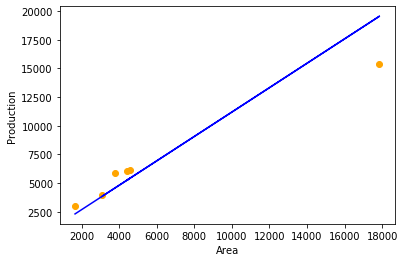

In [177]:
# Plot it on the regression line 
plt.scatter(x_test,y_test, color='orange')
plt.plot(x_test,y_pred, color='blue')
plt.xlabel('Area')
plt.ylabel('Production')

plt.show()


In [178]:
# in the above fig we can say that outliers are removed and the model holds good

In [179]:
# we say that as the area increases even the production(yield) also increases

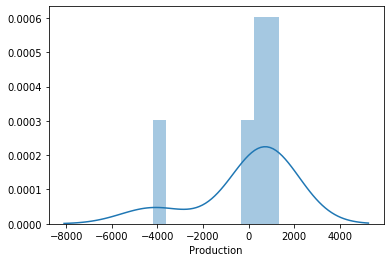

In [180]:
sns.distplot((y_test-y_pred))

In [181]:
#we can say that there is high yield

In [182]:
#coefficient of linear regression
cfd=pd.DataFrame(reg.coef_,X.columns,columns=['Coeff'])
cfd

,Coeff
Area,1.063419


In [192]:
error=[] #list 
year=2019
for i in range(0,17):
  
  X = data[['Precipitation','Min_Temp','Cloud_Cover','Vapour_pressure','Area']].drop(i)
  Y = data['Production'].drop(i)
  x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
  reg= LinearRegression()
  reg.fit(x_train,y_train)

  y_pred=reg.predict([data.loc[i,'Precipitation':'Area']])
  y_pred
  
  print(' Year:',year,'-\n','Predicted Production:',y_pred,', ','Actual Production:',[data.loc[i,'Production']],', ','Error: ',y_pred-data.loc[i,'Production'])
  error.append(float(y_pred-data.loc[i,'Production']))
  year+=1
  

 Year: 2019 -
 Predicted Production: [4018.31403916] ,  Actual Production: [9043] ,  Error:  [-5024.68596084]
 Year: 2020 -
 Predicted Production: [20602.04487272] ,  Actual Production: [20981] ,  Error:  [-378.95512728]
 Year: 2021 -
 Predicted Production: [13133.02639204] ,  Actual Production: [6054] ,  Error:  [7079.02639204]
 Year: 2022 -
 Predicted Production: [5651.00436698] ,  Actual Production: [5903] ,  Error:  [-251.99563302]
 Year: 2023 -
 Predicted Production: [5650.08822077] ,  Actual Production: [2759] ,  Error:  [2891.08822077]
 Year: 2024 -
 Predicted Production: [6150.21010175] ,  Actual Production: [10986] ,  Error:  [-4835.78989825]
 Year: 2025 -
 Predicted Production: [4089.34216346] ,  Actual Production: [3952] ,  Error:  [137.34216346]
 Year: 2026 -
 Predicted Production: [-1465.93283751] ,  Actual Production: [2958] ,  Error:  [-4423.93283751]
 Year: 2027 -
 Predicted Production: [6039.46229762] ,  Actual Production: [3325] ,  Error:  [2714.46229762]
 Year: 2028 